In [1]:
%matplotlib inline
import sys 
sys.path.insert(0,'E:\\Lixiangkun\\Sources\\python')

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.integrate import ode
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import os
import re

from consts import * 
from transform2D import * 
from gpt_modules import *
from FELs import *

In [2]:
B=1.2
lam_u=3.8e-2
gamma=32/g_mec2+1

K=undulator_parameter(B,lam_u)
lam_s=resonant_wavelength(K,lam_u,gamma)

print K,lam_s,6.95-42*lam_u/2

4.25780422935 4.72414185848e-05 6.152


In [2]:
os.chdir("E:\\Lixiangkun\\Work\\ERL-THz\\Arc1")
#gpt_split('test.txt')

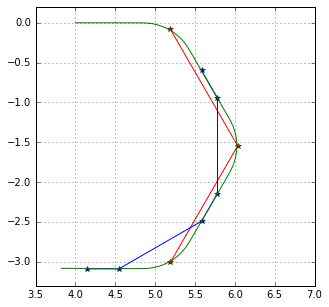

In [13]:
# calculate positions of elements
R,alpha,beta=600e-3,60,0
Lquad=0.09

B1=1
Lbend=R*alpha/180*np.pi
#print tran.Pc,B1

Q01,Q02=0.3,-0.3
D01,D02,D03=0.1,0.4-Lquad,0.3

Q1,Q2=0.3,-0.3#0.4,-0.4
D1,D2,D3=0.3,0.4-Lquad,0.3

Q11,Q12=0.3,-0.3
D11,D12,D13=0.3,0.4-Lquad,0.3

pos,R,alpha=4,0.6,60./180*np.pi
q_coor=[]
b_coor=[]

L=D01+Lquad/2
z,x=pos+L,0
#q_coor.append([z,x])
z,x=z+D02+Lquad,0
#q_coor.append([z,x])

L=D01+Lquad+D02+Lquad+D03
z,x=pos+L+R*np.sin(alpha/2.),R*(np.cos(alpha/2)-1)
b_coor.append([z,x])

## end of bending1
ZB1,XB1=pos+L+R*np.sin(alpha),R*(np.cos(alpha)-1)

L=D1+Lquad/2
z,x=ZB1+L*np.cos(alpha),XB1-L*np.sin(alpha)
q_coor.append([z,x])
L=D1+Lquad+D2+Lquad/2
z,x=ZB1+L*np.cos(alpha),XB1-L*np.sin(alpha)
q_coor.append([z,x])

L=D1+Lquad+D2+Lquad+D3
z,x=ZB1+L*np.cos(alpha)+R*(1-np.cos(alpha/2.)),XB1-L*np.sin(alpha)-R*np.sin(alpha/2.)
b_coor.append([z,x])

## end of bending2
ZB2,XB2=ZB1+L*np.cos(alpha),XB1-L*np.sin(alpha)-2*R*np.sin(alpha/2.)

L=D3+Lquad/2
z,x=ZB2-L*np.cos(alpha),XB2-L*np.sin(alpha)
q_coor.append([z,x])
L=D3+Lquad+D2+Lquad/2
z,x=ZB2-L*np.cos(alpha),XB2-L*np.sin(alpha)
q_coor.append([z,x])

L=D3+Lquad+D2+Lquad+D1
## end of bending3
ZB3,XB3=ZB2-L*np.cos(alpha)-R*np.sin(alpha),XB2-L*np.sin(alpha)-R*(1-np.cos(alpha))

z,x=ZB3+R*np.sin(alpha/2.),XB3+R*(1-np.cos(alpha/2.))
b_coor.append([z,x])

L=D11+Lquad/2.
z,x=ZB3-L,XB3
q_coor.append([z,x])

L=D11+Lquad+D12+Lquad/2.
z,x=ZB3-L,XB3
q_coor.append([z,x])

q_coor=np.array(q_coor)
b_coor=np.array(b_coor)

plt.figure(figsize=(5,5))
plt.plot(b_coor[:,0],b_coor[:,1],'r-*')
plt.plot(q_coor[:,0],q_coor[:,1],'b-*')
plt.axis([3.5,7,-3.3,0.2])
###
#data=np.loadtxt('time_test.txt',skiprows=1)
#plt.plot(data[:,1],data[:,2],'g')
###
plt.grid()
plt.savefig('traj.eps')
#plt.show()

In [43]:
# example 5: quads and bends are all represented by field-maps, no quads before bend
# 
os.chdir("E:\\Lixiangkun\\Work\\ERL-THz\\Arc1")

B_field=0.1662/0.1382
q_grad=-np.array([-1.3588, 0.8686, 0.7903,-0.3204,-0.3204, 0.7903, 0.7338,-0.7191])*0.1/0.117885
q_grad=-np.array([-1.2310, 0.8576, 0.7516,-0.2063,-0.2063, 0.7516, 0.7542,-0.8640])*0.1/0.117885

q_grad=-np.array([ 0.7516,-0.2063,-0.2063, 0.7516, 0.7542,-0.8640])*0.1/0.117885
q_grad=-np.array([ 0.5269,-0.2425,-0.2425,0.5269])*0.1/0.117885

q_angle=-np.array([alpha,alpha,2*alpha,2*alpha,3*alpha,3*alpha])

pos,R,alpha=4,0.6,-60./180*np.pi

astra2gpt('ast.0400.000','ast.0400.to_gpt')
def example():
    gpt=GPT()
    
    gpt.set_m()
    gpt.set_q()
    gpt.setfile('beam','ast.0400.gdf')
    #gpt.spacecharge3Dmesh()

    for i in np.arange(3):
        angle=alpha*(0.5+i)
        gpt.map3D_B(ECS('wcs',matrix=[b_coor[i,1],0,b_coor[i,0],np.cos(angle),0,-np.sin(angle),0,1,0]),'Bending2.gdf',B_field)

    for i in np.arange(4):
        angle=q_angle[i]
        gpt.map3D_B(ECS('wcs',matrix=[q_coor[i,1],0,q_coor[i,0],np.cos(angle),0,-np.sin(angle),0,1,0]),'Quadrupole.gdf',q_grad[i])

    gpt.set_dtmin(3e-12)
    gpt.tout(0,1.8e-8,100e-12)
    gpt.write('gpt1.in')
example()

In [28]:
fname='test1'
cmd=str.format('gpt -o %s.gdf gpt1.in' % (fname))
os.system(cmd)
cmd=str.format('gdfa -o time_%s.gdf %s.gdf time avgz nemixrms nemiyrms stdx stdy stdz avgE stdE time' % (fname,fname))
os.system(cmd)
cmd=str.format('gdf2a -w 12 -o time_%s.txt time_%s.gdf' % (fname,fname))
os.system(cmd)

0

In [96]:
# example 1: 
# 
os.chdir("E:\\Lixiangkun\\Work\\ERL-THz\\Arc1")

Lquad,Rquad=0.09,2.15e-2
Q01,Q02=0.3,-0.3
D01,D02,D03=0.1,0.4-Lquad,0.3

R=600e-3
alpha=60
beta=0

Bfield=-0.205
grad=-np.array([-1.3588, 0.8686, 0.7903,-0.3204,-0.3204, 0.7903, 0.7338,-0.7191])*0.1/Rquad

Q1,Q2=0.3,-0.3#0.4,-0.4
D1,D2,D3=0.3,0.4-Lquad,0.3

Q11,Q12=0.3,-0.3
D11,D12,D13=0.3,0.4-Lquad,0.3

pos,R,alpha=4,0.6,60./180*np.pi
cc,ss=np.cos(alpha),np.sin(alpha)

astra2gpt('ast.0400.000','ast.0400.to_gpt')
def example():
    gpt=GPT()
    #gpt.setparticles('beam',30001,g_me,g_qe,90e-12)
    gpt.set_m()
    gpt.set_q()
    gpt.setfile('beam','ast.0400.gdf')
    #gpt.spacecharge3Dmesh()
    ###
    L=D01+Lquad/2
    z,x=pos+L,0
    gpt.quadrupole(ECS('WCS','z',z),0.09,grad[0])
    L=D01+Lquad+D02+Lquad/2
    z,x=pos+L,0
    gpt.quadrupole(ECS('WCS','z',z),0.09,grad[1])

    L=D01+Lquad+D02+Lquad+D03
    ZB10,XB10=pos+L,0
    ZB11,XB11=pos+L+R*np.sin(alpha),R*(np.cos(alpha)-1)

    gpt.ccs(ECS('WCS','z',ZB10),'B10')
    gpt.ccs(ECS('WCS',matrix=[XB11,0,ZB11,np.cos(alpha),0,-np.sin(alpha),0,1,0]),'B11')
    gpt.sectormagnet('B10','B11',R,Bfield)
    ###
    L=D1+Lquad/2
    z,x=L,0
    gpt.quadrupole(ECS('B11','z',z),0.09,grad[2])
    L=D1+Lquad+D2+Lquad/2
    z,x=L,0
    gpt.quadrupole(ECS('B11','z',z),0.09,grad[3])
    
    L=D1+Lquad+D2+Lquad+D3
    ZB20,XB20=L,0
    ZB21,XB21=pos+L+R*np.sin(alpha),R*(np.cos(alpha)-1)

    gpt.ccs(ECS('B11','z',ZB20),'B20')
    gpt.ccs(ECS('B11',matrix=[XB21,0,ZB21,np.cos(alpha),0,-np.sin(alpha),0,1,0]),'B21')
    gpt.sectormagnet('B20','B21',R,Bfield)
    ###
    L=D3+Lquad/2
    z,x=L,0
    gpt.quadrupole(ECS('B21','z',z),0.09,grad[4])
    L=D3+Lquad+D2+Lquad/2
    z,x=L,0
    gpt.quadrupole(ECS('B21','z',z),0.09,grad[5])
    
    L=D3+Lquad+D2+Lquad+D1
    ZB30,XB30=L,0
    ZB31,XB31=pos+L+R*np.sin(alpha),R*(np.cos(alpha)-1)

    gpt.ccs(ECS('B21','z',ZB30),'B30')
    gpt.ccs(ECS('B21',matrix=[XB31,0,ZB31,np.cos(alpha),0,-np.sin(alpha),0,1,0]),'B31')
    gpt.sectormagnet('B30','B31',R,Bfield)
    ###
    L=D11+Lquad/2
    z,x=L,0
    gpt.quadrupole(ECS('B31','z',z),0.09,grad[6])
    L=D11+Lquad+D12+Lquad/2
    z,x=L,0
    gpt.quadrupole(ECS('B31','z',z),0.09,grad[7])
    ###
    gpt.tout(0,3e-8,1e-9)
    gpt.write()
example()

In [6]:
# example 2: 
# 
os.chdir("E:\\Lixiangkun\\Work\\ERL-THz\\Arc1")

Lquad,Rquad=0.09,2.15e-2
Q01,Q02=0.3,-0.3
D01,D02,D03=0.1,0.4-Lquad,0.3

R=600e-3
alpha=60
beta=0

Bfield=0.205/0.1382
grad=-np.array([-1.3588, 0.8686, 0.7903,-0.3204,-0.3204, 0.7903, 0.7338,-0.7191])*0.1/Rquad

Q1,Q2=0.3,-0.3#0.4,-0.4
D1,D2,D3=0.3,0.4-Lquad,0.3

Q11,Q12=0.3,-0.3
D11,D12,D13=0.3,0.4-Lquad,0.3

pos,R,alpha=4,0.6,60./180*np.pi

astra2gpt('ast.0400.000','ast.0400.to_gpt')
def example():
    gpt=GPT()
    #gpt.setparticles('beam',30001,g_me,g_qe,90e-12)
    gpt.set_m()
    gpt.set_q()
    gpt.setfile('beam','ast.0400.gdf')
    #gpt.spacecharge3Dmesh()
    ###
    L=D01+Lquad/2
    z,x=pos+L,0
    gpt.quadrupole(ECS('wcs','z',z),0.09,grad[0])
    L=D01+Lquad+D02+Lquad/2
    z,x=pos+L,0
    gpt.quadrupole(ECS('wcs','z',z),0.09,grad[1])

    L=D01+Lquad+D02+Lquad+D03
    ZB10,XB10=pos+L,0
    ZB1C,XB1C=pos+L+R*np.sin(alpha/2.),R*(np.cos(alpha/2.)-1)
    ZB11,XB11=pos+L+R*np.sin(alpha),R*(np.cos(alpha)-1)

    gpt.ccs(ECS('wcs','z',ZB10),'B10')
    gpt.ccs(ECS('wcs',matrix=[XB1C,0,ZB1C,np.cos(alpha/2.),0,-np.sin(alpha/2.),0,1,0]),'B1C')
    gpt.ccs(ECS('wcs',matrix=[XB11,0,ZB11,np.cos(alpha),0,-np.sin(alpha),0,1,0]),'B11')
    
    gpt.map3D_B(ECS('B1C','I'),'Bending2.gdf',Bfield)
    ###
    L=D1+Lquad/2
    z,x=L,0
    gpt.quadrupole(ECS('B11','z',z),0.09,grad[2])
    L=D1+Lquad+D2+Lquad/2
    z,x=L,0
    gpt.quadrupole(ECS('B11','z',z),0.09,grad[3])
    
    L=D1+Lquad+D2+Lquad+D3
    ZB20,XB20=L,0
    ZB2C,XB2C=L+R*np.sin(alpha/2.),R*(np.cos(alpha/2.)-1)
    ZB21,XB21=L+R*np.sin(alpha),R*(np.cos(alpha)-1)

    gpt.ccs(ECS('B11','z',ZB20),'B20')
    gpt.ccs(ECS('B11',matrix=[XB2C,0,ZB2C,np.cos(alpha/2.),0,-np.sin(alpha/2.),0,1,0]),'B2C')
    gpt.ccs(ECS('B11',matrix=[XB21,0,ZB21,np.cos(alpha),0,-np.sin(alpha),0,1,0]),'B21')
    
    gpt.map3D_B(ECS('B2C','I'),'bending.gdf',Bfield)
    ###
    L=D3+Lquad/2
    z,x=L,0
    gpt.quadrupole(ECS('B21','z',z),0.09,grad[4])
    L=D3+Lquad+D2+Lquad/2
    z,x=L,0
    gpt.quadrupole(ECS('B21','z',z),0.09,grad[5])
    
    L=D3+Lquad+D2+Lquad+D1
    ZB30,XB30=L,0
    ZB3C,XB3C=L+R*np.sin(alpha/2.),R*(np.cos(alpha/2.)-1)
    ZB31,XB31=L+R*np.sin(alpha),R*(np.cos(alpha)-1)

    gpt.ccs(ECS('B21','z',ZB30),'B30')
    gpt.ccs(ECS('B21',matrix=[XB3C,0,ZB3C,np.cos(alpha/2.),0,-np.sin(alpha/2.),0,1,0]),'B3C')
    gpt.ccs(ECS('B21',matrix=[XB31,0,ZB31,np.cos(alpha),0,-np.sin(alpha),0,1,0]),'B31')
 
    gpt.map3D_B(ECS('B3C','I'),'bending.gdf',Bfield)
    ###
    L=D11+Lquad/2
    z,x=L,0
    gpt.quadrupole(ECS('B31','z',z),0.09,grad[6])
    L=D11+Lquad+D12+Lquad/2
    z,x=L,0
    gpt.quadrupole(ECS('B31','z',z),0.09,grad[7])
    ###
    gpt.tout(0,1e-8,10e-12)
    gpt.write()
example()

In [53]:
# example 3: 
# 
os.chdir("E:\\Lixiangkun\\Work\\ERL-THz\\Arc1")

Bfield=0.165995/0.1382
grad=-np.array([-1.3588, 0.8686, 0.7903,-0.3204,-0.3204, 0.7903, 0.7338,-0.7191])*0.1/2.15e-2

pos,R,alpha=4,0.6,-60./180*np.pi

astra2gpt('ast.0400.000','ast.0400.to_gpt')
def example():
    gpt=GPT()
    #gpt.setparticles('beam',30001,g_me,g_qe,90e-12)
    gpt.set_m()
    gpt.set_q()
    gpt.setfile('beam','ast.0400.gdf')
    #gpt.spacecharge3Dmesh()

    gpt.map3D_B(ECS('wcs',matrix=[b_coor[0,1],0,b_coor[0,0],np.cos(alpha*0.5),0,-np.sin(alpha*0.5),0,1,0]),'Bending2.gdf',Bfield)
    gpt.map3D_B(ECS('wcs',matrix=[b_coor[1,1],0,b_coor[1,0],np.cos(alpha*1.5),0,-np.sin(alpha*1.5),0,1,0]),'Bending2.gdf',Bfield)
    gpt.map3D_B(ECS('wcs',matrix=[b_coor[2,1],0,b_coor[2,0],np.cos(alpha*2.5),0,-np.sin(alpha*2.5),0,1,0]),'Bending2.gdf',Bfield)
    
    gpt.quadrupole(ECS('wcs','z',q_coor[0,1]),0.09,grad[0])
    gpt.quadrupole(ECS('wcs','z',q_coor[1,1]),0.09,grad[1])
    
    gpt.quadrupole(ECS('wcs',matrix=[q_coor[2,1],0,q_coor[2,0],np.cos(alpha*1.0),0,-np.sin(alpha*1.0),0,1,0]),0.09,grad[2])
    gpt.quadrupole(ECS('wcs',matrix=[q_coor[3,1],0,q_coor[3,0],np.cos(alpha*1.0),0,-np.sin(alpha*1.0),0,1,0]),0.09,grad[3])

    gpt.quadrupole(ECS('wcs',matrix=[q_coor[4,1],0,q_coor[4,0],np.cos(alpha*2.0),0,-np.sin(alpha*2.0),0,1,0]),0.09,grad[4])
    gpt.quadrupole(ECS('wcs',matrix=[q_coor[5,1],0,q_coor[5,0],np.cos(alpha*2.0),0,-np.sin(alpha*2.0),0,1,0]),0.09,grad[5])

    gpt.quadrupole(ECS('wcs',matrix=[q_coor[6,1],0,q_coor[6,0],np.cos(alpha*3.0),0,-np.sin(alpha*3.0),0,1,0]),0.09,grad[6])
    gpt.quadrupole(ECS('wcs',matrix=[q_coor[7,1],0,q_coor[7,0],np.cos(alpha*3.0),0,-np.sin(alpha*3.0),0,1,0]),0.09,grad[7])

    gpt.set_dtmin(3e-12)
    gpt.tout(0,2e-8,20e-12)
    gpt.write()
example()

In [9]:
# example 4: quads and bends are all represented by field-maps
# 
os.chdir("E:\\Lixiangkun\\Work\\ERL-THz\\Arc1")

B_field=0.1662/0.1382
q_grad=-np.array([-1.3588, 0.8686, 0.7903,-0.3204,-0.3204, 0.7903, 0.7338,-0.7191])*0.1/0.117885
q_grad=-np.array([-1.2310, 0.8576, 0.7516,-0.2063,-0.2063, 0.7516, 0.7542,-0.8640])*0.1/0.117885

q_angle= np.array([0,0,alpha,alpha,2*alpha,2*alpha,3*alpha,3*alpha])

pos,R,alpha=4,0.6,-60./180*np.pi

astra2gpt('ast.0400.000','ast.0400.to_gpt')
def example():
    gpt=GPT()
    
    gpt.set_m()
    gpt.set_q()
    gpt.setfile('beam','ast.0400.gdf')
    #gpt.spacecharge3Dmesh()

    for i in np.arange(3):
        angle=alpha*(0.5+i)
        gpt.map3D_B(ECS('wcs',matrix=[b_coor[i,1],0,b_coor[i,0],np.cos(angle),0,-np.sin(angle),0,1,0]),'Bending2.gdf',B_field)

    for i in np.arange(8):
        angle=q_angle[i]
        gpt.map3D_B(ECS('wcs',matrix=[q_coor[i,1],0,q_coor[i,0],np.cos(angle),0,-np.sin(angle),0,1,0]),'Quadrupole.gdf',q_grad[i])

    gpt.set_dtmin(3e-12)
    gpt.tout(0,2e-8,100e-12)
    gpt.write()
example()

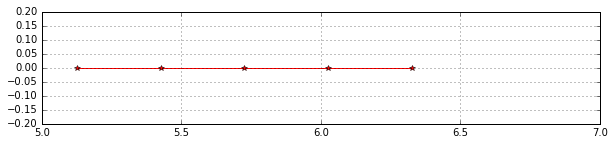

In [40]:
# Pre-merger
workdir='E:\\Lixiangkun\\Work\\ERL-THz\\Pre-merger\\_'
os.chdir(workdir)

Lquad,Rquad=0.09,2.15e-2

Dri=0.3
D=np.array([0.08,Dri-Lquad,Dri-Lquad+0.,Dri-Lquad+0.,Dri-Lquad,Dri-Lquad,0.18]).T

q_coor=np.zeros((5,2))

q_coor[0,0]=D[0]+Lquad/2.
for i in np.arange(1,5):
    q_coor[i,0]=q_coor[i-1,0]+D[i]+Lquad

q_coor[:,0]=q_coor[:,0]+5

plt.figure(figsize=(10,2))
plt.plot(q_coor[:,0],q_coor[:,1],'r-*')
plt.axis([5,7,-0.2,0.2])
plt.grid()
plt.show()

q_grad=-np.array([ 0.1256,-0.2706, 0.1000,-0.2706, 0.1146]).T/10./0.117885 # 5月17日

#astra2gpt('ast.0500.000','ast.0500.gpt')
def example():
    gpt=GPT()
    
    gpt.set_m()
    gpt.set_q()
    gpt.setfile('beam','ast.0500.gdf')
    #gpt.spacecharge3Dmesh()

    for i in np.arange(5):
        angle=0
        gpt.map3D_B(ECS('wcs',matrix=[q_coor[i,1],0,q_coor[i,0],np.cos(angle),0,-np.sin(angle),0,1,0]),\
                    'Quadrupole.gdf',q_grad[i])

    gpt.set_dtmin(3e-12)
    gpt.tout(0,1.e-8,100e-12)
    gpt.write('pre-merger.in')
example()

0.0509395496396


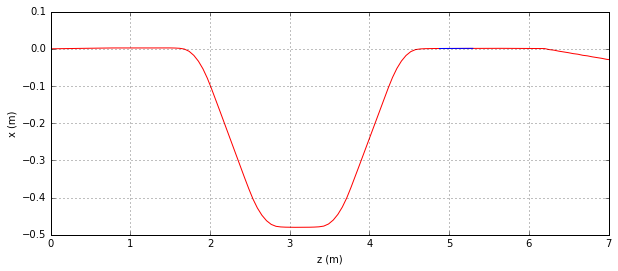

In [76]:
workdir='E:\\Lixiangkun\\Work\\ERL-THz\\Chicane'
def gpt_fitting():
    data=np.loadtxt('time_test.txt',skiprows=1)
    z=data[:,1]
    x=data[:,2]
    n1=170
    n2=n1+15

    f1 = lambda x,a,b:a+b*x
    popt,pcov=curve_fit(f1,z[n1:n2],x[n1:n2])
    a,b=popt
    alpha=np.arctan(b)*180./np.pi
    print alpha

    fig,axes=plt.subplots(figsize=(10,4))
    axes.plot(z[::2],x[::2],'r-')
    axes.plot(z[n1:n2],f1(z[n1:n2],a,b),'b')
    #axes.axis([3.5,7.5,-3.8,0.2])
    axes.axis([0,7,-0.5,0.1])
    #axes.plot(z,f1(z,a,b),'b')
    axes.grid()
    axes.set_xlabel('z (m)')
    axes.set_ylabel('x (m)')
    fig.savefig('1.eps')
gpt_fitting()

## Chicane

0.181041913207
[ 0.14820011 -0.14770924 -0.14678532  0.14726099]


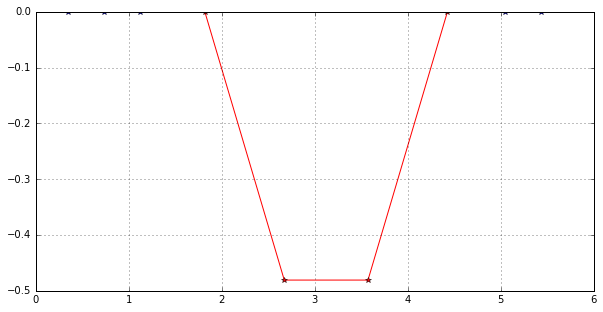

In [61]:
# 
workdir='E:\\Lixiangkun\\Work\\ERL-THz\\Chicane'
os.chdir(workdir)

pos0=0.
alpha,beta=30*np.pi/180.,0*np.pi/180.

D01,D02,D03,D04=0.3,0.3,0.3,0.5
L0,L1,L2=0.3,0.64,0.3

Lquad=0.09
rho=L0/np.sin(alpha)
dx=L1*np.sin(alpha)
dz=L1*np.cos(alpha)

b_coor=[]
q_coor=[]

z,x=D01+Lquad/2,0
q_coor.append([z,x])
z,x=z+D02+Lquad,0
q_coor.append([z,x])
z,x=z+D03+Lquad,0
q_coor.append([z,x])

z,x=z+Lquad/2+D04+L0/2,0
b_coor.append([z,x])
z,x=z+L0/2+dz+L0/2,-2*rho*(1-np.cos(alpha))-dx
b_coor.append([z,x])
z,x=z+L0/2+L2*2+L0/2,x
b_coor.append([z,x])
z,x=z+L0/2+dz+L0/2,0
b_coor.append([z,x])

z,x=5.0+Lquad/2,0
q_coor.append([z,x])
z,x=z+0.3+Lquad,0
q_coor.append([z,x])

q_coor=np.array(q_coor)
b_coor=np.array(b_coor)
#print b_coor

plt.figure(figsize=(10,5))
plt.plot(b_coor[:,0],b_coor[:,1],'r-*')
plt.plot(q_coor[:,0],q_coor[:,1],'b-*')
#plt.axis([3.5,7,-3.3,0.2])
###
data=np.loadtxt('time_test.txt',skiprows=1)
#plt.plot(data[:,1],data[:,2],'g')
###
plt.grid()
plt.savefig('traj.eps')
#plt.show()

Pxc,Pyc,Pzc=-2.5108E+03, -5.7268E+00,  3.2565E+07 # eV/c
Brho=P=np.sqrt(Pxc**2+Pyc**2+Pzc**2)/g_c
#print rho

bfield=Brho/rho
print bfield
bfield1=0.14820011
bfield2=0.14770924
bfield3=0.14678532
bfield4=0.14726099
B_field=np.array([bfield1,-bfield2,-bfield3,bfield4])
#q_field=np.array([0.3215,-0.5986,0.3215])*0.1
q_field=np.array([0.2840,-0.5401,0.2840])*0.1
q_field=np.array([-0.2685,0.5143,-0.2685])*0.1/2.15e-2
q_field=np.array([-0.2889,0.4351,-0.2030,-0.4394,0.3582])*0.1/2.15e-2

print B_field
def example():
    
    gpt=GPT()
    gpt.set_m()
    gpt.set_q()
    gpt.setfile('beam','time_17.00ns.gdf')
    #gpt.spacecharge3Dmesh()

    for i in np.arange(3):
        angle=0
        gpt.map3D_B(ECS('wcs',matrix=[q_coor[i,1],0,q_coor[i,0],np.cos(angle),0,-np.sin(angle),0,1,0]),\
                    'Quadrupole-norm.gdf',q_field[i])

    for i in np.arange(4):
        angle=0
        gpt.map3D_B(ECS('wcs',matrix=[b_coor[i,1],0,b_coor[i,0],np.cos(angle),0,-np.sin(angle),0,1,0]),\
                    'rBending-n300mm.gdf',B_field[i])

    gpt.set_dtmin(3e-12)
    gpt.tout(0,2.2e-8,100e-12)
    #gpt.tout(1.70e-8)
    gpt.write('Chicane1.in')
example()
gpt_batch("Chicane1")

In [3]:
gpt_split('test.txt')

In [186]:
## 插值
xx=np.array([0.2,  0.192,0.185])
yy=np.array([23.44,22.6458,21.796])
ff=interp1d(yy,xx,bounds_error=False)
print ff(22.5)

0.190799011532


In [198]:
xx=np.array([0.1908,0.1890,0.185])
yy=np.array([0.1655,0.1008,-0.36934])
ff=interp1d(yy,xx,bounds_error=False)
print ff(0)

0.18814238312


In [220]:
xx=np.array([0.1908,0.1326,0.1908*15/22.5])
yy=np.array([21.8244,15.01508,14.3709])
ff=interp1d(yy,xx,bounds_error=False)
print ff(15)

0.132473588128


In [235]:
xx=np.array([0.1294,0.1304,0.135])
yy=np.array([-0.23128,-0.11315,1.0198])
ff=interp1d(yy,xx,bounds_error=False)
print ff(0)

0.130859411271


0.181041913207
[ 0.14820011 -0.14770924 -0.14678532  0.14726099]


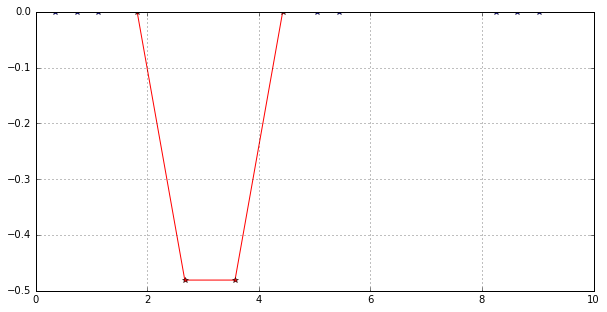

In [75]:
# 
workdir='E:\\Lixiangkun\\Work\\ERL-THz\\Chicane'
os.chdir(workdir)

pos0=0.
alpha,beta=30*np.pi/180.,0*np.pi/180.

D01,D02,D03,D04=0.3,0.3,0.3,0.5
L0,L1,L2=0.3,0.64,0.3

Lquad=0.09
rho=L0/np.sin(alpha)
dx=L1*np.sin(alpha)
dz=L1*np.cos(alpha)

b_coor=[]
q_coor=[]

z,x=D01+Lquad/2,0
q_coor.append([z,x])
z,x=z+D02+Lquad,0
q_coor.append([z,x])
z,x=z+D03+Lquad,0
q_coor.append([z,x])

z,x=z+Lquad/2+D04+L0/2,0
b_coor.append([z,x])
z,x=z+L0/2+dz+L0/2,-2*rho*(1-np.cos(alpha))-dx
b_coor.append([z,x])
z,x=z+L0/2+L2*2+L0/2,x
b_coor.append([z,x])
z,x=z+L0/2+dz+L0/2,0
b_coor.append([z,x])

z,x=5.0+Lquad/2,0
q_coor.append([z,x])
z,x=z+0.3+Lquad,0
q_coor.append([z,x])

#8.2-7.81267,0.3,0.3
z,x=8.2+Lquad/2,0
q_coor.append([z,x])
z,x=z+0.3+Lquad,0
q_coor.append([z,x])
z,x=z+0.3+Lquad,0
q_coor.append([z,x])

q_coor=np.array(q_coor)
b_coor=np.array(b_coor)
#print b_coor

plt.figure(figsize=(10,5))
plt.plot(b_coor[:,0],b_coor[:,1],'r-*')
plt.plot(q_coor[:,0],q_coor[:,1],'b-*')
#plt.axis([3.5,7,-3.3,0.2])
###
#data=np.loadtxt('time_test.txt',skiprows=1)
#plt.plot(data[:,1],data[:,2],'g')
###
plt.grid()
plt.savefig('traj.eps')
#plt.show()

Pxc,Pyc,Pzc=-2.5108E+03, -5.7268E+00,  3.2565E+07 # eV/c
Brho=P=np.sqrt(Pxc**2+Pyc**2+Pzc**2)/g_c
#print rho

bfield=Brho/rho
print bfield
bfield1=0.14820011
bfield2=0.14770924
bfield3=0.14678532
bfield4=0.14726099
B_field=np.array([bfield1,-bfield2,-bfield3,bfield4])
#q_field=np.array([0.3215,-0.5986,0.3215])*0.1
q_field=np.array([0.2840,-0.5401,0.2840])*0.1
q_field=np.array([-0.2685,0.5143,-0.2685])*0.1/2.15e-2
q_field=np.array([-0.2889,0.4351,-0.2030,-0.4394,0.3582,-0.9851,0.5650,-0.175])*0.1/2.15e-2

#D01,D02,D03,D04=8.2-7.81267,0.3,0.3,0.3
#Q1,Q2,Q3=-0.9851,0.5650,-0.175
print B_field
def example():
    
    gpt=GPT()
    gpt.set_m()
    gpt.set_q()
    #gpt.set_time(1.80e-8)
    #gpt.setfile('beam','test0.gdf')
    gpt.setfile('beam','time_17.00ns.gdf')
    #gpt.spacecharge3Dmesh()

    for i in np.arange(8):
        angle=0
        gpt.map3D_B(ECS('wcs',matrix=[q_coor[i,1],0,q_coor[i,0],np.cos(angle),0,-np.sin(angle),0,1,0]),\
                    'Quadrupole-norm.gdf',q_field[i])

    for i in np.arange(4):
        angle=0
        gpt.map3D_B(ECS('wcs',matrix=[b_coor[i,1],0,b_coor[i,0],np.cos(angle),0,-np.sin(angle),0,1,0]),\
                    'rBending-n300mm.gdf',B_field[i])

    gpt.unduplan(ECS('wcs','z',6.95),42,3.8e-2,1.0)
    
    gpt.set_dtmin(3e-12)
    gpt.tout(0,3.2e-8,100e-12)
    #gpt.tout(2.68000e-008)
    gpt.write('Chicane1.in')
example()
gpt_batch("Chicane1")

In [19]:
gpt_split('test.txt')

In [75]:
workdir='E:\\Lixiangkun\\Work\\ERL-THz\\Chicane'
os.chdir(workdir)
gpt2undulator2('time_21.20ns.txt','time_21.20ns.tran')

-0.000627453773711
-0.00013475259932 -0.38 -4.40527994277e-18


In [41]:
def example():
    
    gpt=GPT()
    gpt.set_m()
    gpt.set_q()
    #gpt.set_time(1.80e-8)
    #gpt.setfile('beam','test0.gdf')
    gpt.setfile('beam','time_21.20ns.gdf')
    #gpt.spacecharge3Dmesh()

    gpt.unduplan(ECS('wcs','z',42*38e-3/2.),42,38e-3,1.0,1,1)
    
    gpt.set_dtmin(3e-12)
    gpt.tout(0,0.6e-8,100e-12)
    #gpt.tout(2.68000e-008)
    gpt.write('Undulator1.in')
example()
gpt_batch("Undulator1")

In [76]:
workdir='E:\\Lixiangkun\\Work\\ERL-THz\\Chicane'
os.chdir(workdir)
gpt_split('test0.txt')

In [77]:
def gpt_split_at(datafile,time,prefix=""):
    '''input : file to be splitted, each subfilename begins with a prefix
       output: no
    '''
    data=open(datafile, 'r')
    while True:
        while True:
            line=data.readline()
            if not line:
                break
            match=re.search(r'^time',line)
            if match:
                time=re.search(r'[\d.+-]+e[\d.+-]+',line)
                if time:
                    t=(float)(time.group())*1e9
                    if t==time:
                        continue
                    fname=str.format('%stime_%.2lfns.txt' % (prefix,t))
                    break
            match=re.search(r'^position',line)
            if match:
                pos=re.search(r'[\d.+-]+e[\d.+-]+',line)
                if pos:
                    t=(float)(pos.group())*1e3
                    fname=str.format('%sposition_%.2lfmm.txt' % (prefix,t))
                    break
        if not line:
            break
        subdata=open(fname,'w')
        while True:
            line=data.readline()
            blank=re.search(r'                                ',line)
            if blank:
                break
            else:
                subdata.write(line)
        subdata.close()
        #break
    data.close()

In [ ]:
workdir='E:\\Lixiangkun\\Work\\ERL-THz\\Chicane'
os.chdir(workdir)
gpt_split('test0.txt',)